<a href="https://colab.research.google.com/github/naimurborno/Object-Detection-using-api/blob/main/Untitled33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ./models/
!git clone --depth 1 https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 3929, done.
remote: Counting objects: 100% (3929/3929), done.
remote: Compressing objects: 100% (3032/3032), done.
remote: Total 3929 (delta 1145), reused 1876 (delta 844), pack-reused 0
Receiving objects: 100% (3929/3929), 49.67 MiB | 17.38 MiB/s, done.
Resolving deltas: 100% (1145/1145), done.


In [2]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

In [3]:
!pip uninstall Pillow

Found existing installation: Pillow 8.4.0
Uninstalling Pillow-8.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PIL/*
    /usr/local/lib/python3.10/dist-packages/Pillow-8.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libfreetype-804dfcff.so.6.18.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libharfbuzz-a69be65e.so.0.30000.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libjpeg-183418da.so.9.4.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblcms2-035b9744.so.2.0.12
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblzma-d540a118.so.5.2.5
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libopenjp2-430a98fc.so.2.4.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libpng16-213e245f.so.16.37.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libtiff-9ffe9659.so.5.7.0
    /usr/local/lib/python3.10/dist-pac

In [4]:
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.9 MB/s eta 0:00:00


In [5]:
%%writefile models/research/setup.py

import os
from setuptools import find_packages
from setuptools import setup

REQUIRED_PACKAGES = [
    'tf-models-official==2.8.0',
    'tensorflow_io==0.24.0',
    'numpy==1.21.5',
    'PyYAML==5.3'

]

setup(
    name='object_detection',
    version='0.1',
    install_requires=REQUIRED_PACKAGES,
    include_package_data=True,
    packages=(
        [p for p in find_packages() if p.startswith('object_detection')] +
        find_packages(where=os.path.join('.', 'slim'))),
    package_dir={
        'datasets': os.path.join('slim', 'datasets'),
        'nets': os.path.join('slim', 'nets'),
        'preprocessing': os.path.join('slim', 'preprocessing'),
        'deployment': os.path.join('slim', 'deployment'),
        'scripts': os.path.join('slim', 'scripts'),
    },
    description='Tensorflow Object Detection Library',
    python_requires='>3.6',
)

Writing models/research/setup.py


In [6]:
!python -m pip install models/research

In [11]:
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageColor
import tensorflow as tf
import tensorflow_hub as hub

In [7]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

In [8]:
PATH_TO_LABELS = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [9]:
module="https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

In [12]:
module=hub.load(module)

In [14]:
detector=module.signatures['default']

In [15]:
!wget "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"

--2023-07-20 08:56:31--  https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 779201 (761K) [image/jpeg]
Saving to: ‘Naxos_Taverna.jpg’

Naxos_Taverna.jpg   100%[===================>] 760.94K  --.-KB/s    in 0.1s    

2023-07-20 08:56:31 (7.65 MB/s) - ‘Naxos_Taverna.jpg’ saved [779201/779201]



In [16]:
import cv2

In [18]:
image_file=cv2.imread('Naxos_Taverna.jpg')

In [53]:
image_file=np.array(image_file)

In [22]:
image_file_in_tensor=tf.convert_to_tensor(image_file)

In [26]:
image_file_in_tensor=tf.image.convert_image_dtype(image_file_in_tensor,tf.float32)[tf.newaxis,...]

In [29]:
result=detector(image_file_in_tensor)

In [43]:
result={key:value.numpy() for key,value in result.items()}

In [44]:
import numpy as np
def load_image_into_numpy_array(image):
  (im_width, im_height) = (image.shape[0],image.shape[1])
  return np.array(image).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)
image_np_with_detections=load_image_into_numpy_array(image_file)

In [42]:
label_id_offset=0
key_points,keypoints_score=None,None

In [46]:
result.keys()

dict_keys(['detection_scores', 'detection_class_names', 'detection_class_labels', 'detection_class_entities', 'detection_boxes'])

In [60]:
result['detection_scores']

array([0.36425358, 0.30397707, 0.28763348, 0.28725243, 0.27311963,
       0.269709  , 0.24780136, 0.23111033, 0.20877302, 0.19128522,
       0.18224663, 0.17036939, 0.16913125, 0.16828817, 0.16646308,
       0.16355547, 0.16046742, 0.15986338, 0.15581906, 0.15556097,
       0.15517524, 0.15495402, 0.15413293, 0.15206695, 0.15138727,
       0.1508331 , 0.15018952, 0.14819738, 0.1480309 , 0.14784235,
       0.1475091 , 0.14494944, 0.14158976, 0.14082   , 0.14022443,
       0.13981688, 0.13916135, 0.13679338, 0.13656712, 0.13558373,
       0.13339141, 0.1331839 , 0.13306552, 0.13293537, 0.13291767,
       0.1325683 , 0.13155276, 0.13149855, 0.13077289, 0.13013288,
       0.12953925, 0.12953085, 0.12949464, 0.12891227, 0.12876424,
       0.12875369, 0.12812033, 0.12782833, 0.12694842, 0.12662974,
       0.1251418 , 0.12389216, 0.12286532, 0.12280607, 0.12275505,
       0.12271938, 0.1222477 , 0.1221348 , 0.12165356, 0.12132934,
       0.12118497, 0.12109572, 0.12076551, 0.11961794, 0.11947

In [49]:
viz_utils.visualize_boxes_and_labels_on_image_

In [63]:
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_file,result['detection_boxes'],result['detection_class_labels'],result['detection_scores'],category_index,use_normalized_coordinates=True, max_boxes_to_draw=200,   # Maximum number of boxes to draw on the image
    min_score_thresh=0.3,    # Minimum confidence score threshold to display a detected object
    agnostic_mode=False,     # If True, visualizes detections as generic (agnostic) boxes, not associated with any class
    line_thickness=4

)

array([[[127, 192, 160],
        [136, 199, 167],
        [149, 204, 171],
        ...,
        [ 63, 135,  82],
        [ 74, 139,  84],
        [ 75, 138,  82]],

       [[136, 203, 172],
        [140, 204, 174],
        [142, 202, 172],
        ...,
        [ 69, 138,  88],
        [ 71, 139,  86],
        [ 81, 149,  92]],

       [[130, 201, 175],
        [138, 206, 181],
        [142, 208, 183],
        ...,
        [ 72, 138,  97],
        [ 70, 142,  90],
        [ 71, 144,  88]],

       ...,

       [[ 45,  47,  65],
        [ 47,  50,  65],
        [ 48,  51,  66],
        ...,
        [100, 104,  93],
        [ 91,  98,  85],
        [ 86,  96,  80]],

       [[ 48,  49,  69],
        [ 43,  45,  63],
        [ 46,  49,  64],
        ...,
        [ 98, 101,  92],
        [ 87,  94,  79],
        [ 90,  98,  81]],

       [[ 43,  44,  64],
        [ 44,  46,  64],
        [ 52,  54,  72],
        ...,
        [ 98, 101,  92],
        [ 99, 106,  91],
        [ 94, 102,  85]]

In [65]:
import cv2

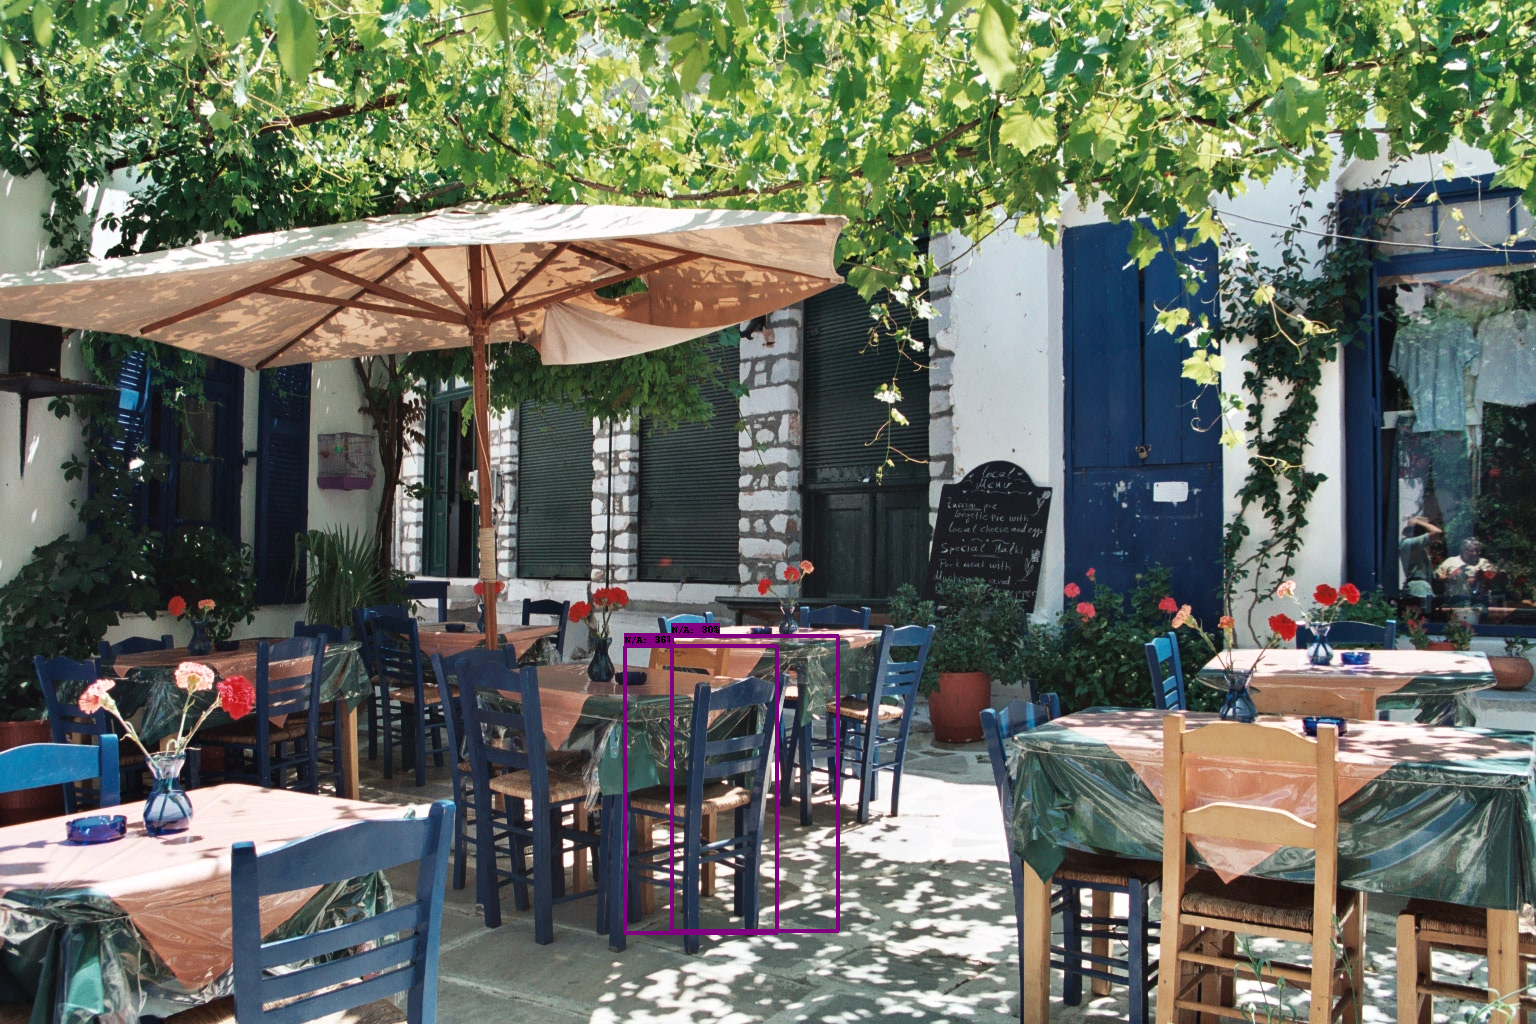

In [67]:
from google.colab.patches import cv2_imshow
cv2_imshow(image_file)